<a href="https://colab.research.google.com/github/Enna2023/Colab_Project/blob/main/week10_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, let's start by loading the data. We'll be using the digits dataset from scikit-learn library, which contains 8x8 pixel images of handwritten digits from 0 to 9.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()


# New Section

Next, let's split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)


We can visualize some of the images in the dataset to get an idea of what the data looks like.

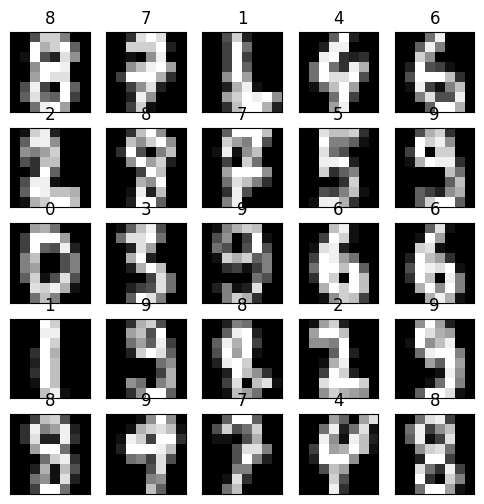

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(8, 8), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(y_train[i])
plt.show()


As discussed, we should try to optimise SVM parameters before fitting a model. It is always a good practice to use GridSearch and explore the optimal configuration of C, gamma, and kernel parameters.
More info about different kernel options https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

Also, we built on this example to build the code for parameter tunning https://aneesha.medium.com/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel':kernels}

    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

Here, we will just call the function we prepared above to run hyperparameter tunning across 10 folds (nfolds = 10)

In [ ]:
svc_param_selection(X_train, y_train, 10)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Next, we'll create an SVM classifier using scikit-learn's SVM module. We'll use the optimal settings we obtained above in parameter tunning.

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=10, gamma=0.001)


Now, let's train the SVM classifier on the training data.

In [ ]:
clf.fit(X_train, y_train)


SVC(C=10, gamma=0.001)

Finally, let's evaluate the performance of the SVM classifier on the testing data.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9907407407407407
